In [1]:
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

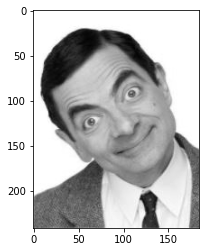

In [5]:
input_img = cv2.imread("mrbean_input.jpg")
input_gray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
rows, cols = input_gray_img.shape
plt.imshow(input_gray_img, cmap='gray')

In [6]:
rows, cols

(242, 185)

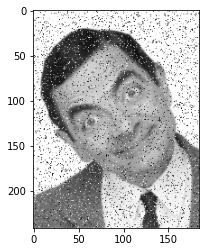

In [14]:
for i in range(5000):
    x = random.randint(0, rows-1)
    y = random.randint(0, cols-1)
    noise_color = random.randint(0, 255)
    input_gray_img[x, y] = noise_color
    
plt.imshow(input_gray_img, cmap="gray")

In [15]:
cv2.imwrite("mrbean_noise.jpg", input_gray_img)

True

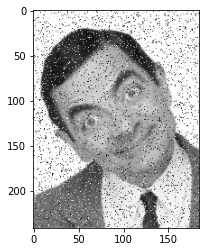

In [8]:
noise_picture = cv2.imread("mrbean_noise.jpg")
noise_picture = cv2.cvtColor(noise_picture, cv2.COLOR_BGR2GRAY)
plt.imshow(noise_picture, cmap="gray")

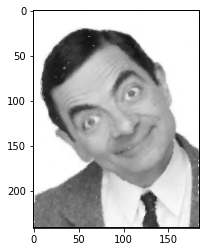

In [24]:
result = np.zeros(noise_picture.shape)
rows, cols = noise_picture.shape

for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        small_img = noise_picture[i-1:i+2, j-1:j+2]
        small_img_1d = small_img.reshape(9)
        small_img_1d_sorted = np.sort(small_img_1d)
        result[i, j] = small_img_1d_sorted[5]
        
cv2.imwrite("result.jpg", result)
plt.imshow(result, cmap="gray")

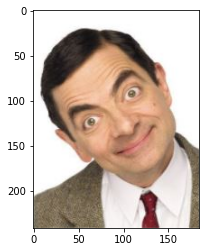

In [35]:
from mtcnn.mtcnn import MTCNN
from PIL import Image
import math
img = plt.imread("mrbean_input.jpg")
plt.imshow(img)
plt.show()

In [36]:
face_detector = MTCNN()

In [37]:
def draw_facebox_and_keypoints(filename, result_list):
    
    data = plt.imread(filename)
    plt.imshow(data)
    ax = plt.gca()
    
    for result in result_list:
        x, y, width, height = result['box']
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
        ax.add_patch(rect)
        
        for key, value in result['keypoints'].items():
            dot = plt.Circle(value, radius=2, color='red')
            ax.add_patch(dot)
            
    plt.show()

In [38]:
results = face_detector.detect_faces(img)

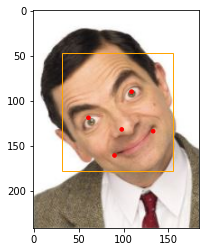

In [39]:
draw_facebox_and_keypoints('mrbean_input.jpg', results)

In [40]:
def EuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [41]:
def alignment_procedure(img, left_eye, right_eye):

    left_eye_x, left_eye_y = left_eye
    right_eye_x, right_eye_y = right_eye

    if left_eye_y > right_eye_y:
        point_3rd = (right_eye_x, left_eye_y)
        direction = -1 #rotate same direction to clock
    else:
        point_3rd = (left_eye_x, right_eye_y)
        direction = 1 #rotate inverse direction of clock

    a = EuclideanDistance(np.array(left_eye), np.array(point_3rd))
    b = EuclideanDistance(np.array(right_eye), np.array(point_3rd))
    c = EuclideanDistance(np.array(right_eye), np.array(left_eye))

    if b != 0 and c != 0:

        cos_a = (b*b + c*c - a*a)/(2*b*c)
        angle = np.arccos(cos_a) #angle in radian
        angle = (angle * 180) / math.pi #radian to degree

        if direction == -1:
            angle = 90 - angle

        img = Image.fromarray(img)
        img = np.array(img.rotate(direction * angle))

    return img

In [42]:
detection = results[0]
keypoints = detection["keypoints"]
left_eye = keypoints["left_eye"]
right_eye = keypoints["right_eye"]

img = alignment_procedure(img, left_eye, right_eye)

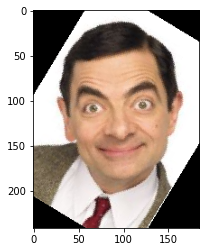

In [43]:
plt.imshow(img)

(242, 185)


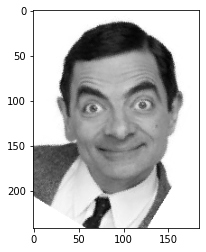

In [44]:

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i, j] == 0:
            img[i, j] = 255
            
plt.imshow(img, cmap="gray")

In [45]:
cv2.imwrite("final_mrbean.jpg", img)

True